In [85]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy import stats


In [61]:
csv_path  = os.path.join("Resources/AlcSales_Project1.csv")
csv_path2 = os.path.join("Resources/Police_csv.csv")

police_data = pd.read_csv(csv_path2)
alcohol_data = pd.read_csv(csv_path)

police_df = pd.DataFrame(police_data)
alc_df = pd.DataFrame(alcohol_data)
police_df.head()


,Unnamed: 0,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUIcrashes/2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUIcrashes/2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272


In [62]:
alc_df.head()


,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,2,1,103645,42598,593378,0.0718,NaN,NaN
1,2017,1,5,1,402885,165586,2455022,0.0674,NaN,NaN
2,2017,1,8,1,733857,301615,4634346,0.0651,NaN,NaN
3,2017,1,9,1,412100,169373,3015481,0.0562,NaN,NaN
4,2017,1,10,1,180388,74139,799550,0.0927,NaN,NaN


In [5]:
state_df = alc_df
state_df['FIPS'].replace({2 :"Alaska", 
                          5: "Arkansas",
                          8: "Colorado",
                          9: "Connecticut", 
                          10: "Deleware", 
                          12 : "Florida", 
                          17 : "Illinois", 
                          20 : "Kansas", 
                          21 : "Kentucky", 
                          22 : "Louisiana", 
                          25 : "Massachusetts", 
                          29 : "Missouri", 
                          38 : "North Dakota", 
                          41 : "Oregon",
                          47 : "Tennessee", 
                          48 : "Texas", 
                          49 : "Utah",
                          51 : "Virginia", 
                          55 : "Wisconsin"
                    
                          
                         }, inplace=True)
state_df.head()


,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017.0,1,Alaska,1.0,103645.0,42598.0,593378.0,0.0718,NaN,NaN
1,2017.0,1,Arkansas,1.0,402885.0,165586.0,2455022.0,0.0674,NaN,NaN
2,2017.0,1,Colorado,1.0,733857.0,301615.0,4634346.0,0.0651,NaN,NaN
3,2017.0,1,Connecticut,1.0,412100.0,169373.0,3015481.0,0.0562,NaN,NaN
4,2017.0,1,Deleware,1.0,180388.0,74139.0,799550.0,0.0927,NaN,NaN


##### 

In [6]:
#changing beverage number to corresponding beverage 

beverage_df = state_df

beverage_df['Beverage'].replace({ 1: "Spirits", 
                                   2 : "Wine", 
                                3: "Beer"}, inplace=True)

beverage_df.head()


,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017.0,1,Alaska,Spirits,103645.0,42598.0,593378.0,0.0718,NaN,NaN
1,2017.0,1,Arkansas,Spirits,402885.0,165586.0,2455022.0,0.0674,NaN,NaN
2,2017.0,1,Colorado,Spirits,733857.0,301615.0,4634346.0,0.0651,NaN,NaN
3,2017.0,1,Connecticut,Spirits,412100.0,169373.0,3015481.0,0.0562,NaN,NaN
4,2017.0,1,Deleware,Spirits,180388.0,74139.0,799550.0,0.0927,NaN,NaN


In [7]:
#Summary statistics table on total Gallons of alcohol per State over a 3 year period 

#gallons_table2 = state_df.groupby(["FIPS"]).agg({"Gallons" : ['mean', 'median', 'var', 'std', 'sem']})


fips1 = state_df.groupby(["FIPS"]).mean()["Gallons"]
fips2 = state_df.groupby(["FIPS"]).median()["Gallons"]
fips3 = state_df.groupby(["FIPS"]).var()["Gallons"]
fips4 = state_df.groupby(["FIPS"]).std()["Gallons"]
fips5 = state_df.groupby(["FIPS"]).sem()["Gallons"]
fips6 = state_df.groupby(["FIPS"]).sum()["Gallons"]

gallons_table = pd.DataFrame({"Mean": fips1.map("{:,.2f}".format), "Median": fips2.map("{:,.2f}".format), "Variance": fips3.map("{:,.2f}".format),
              "STD": fips4.map("{:,.2f}".format), "SEM": fips5.map("{:,.2f}".format), "Sum": fips6.map("{:,.2f}".format)})
gallons_table

,Mean,Median,Variance,STD,SEM,Sum
FIPS,,,,,,
Alaska,"506,061.90","199,086.00","246,150,691,223.82","496,135.76","42,700.57","68,318,357.00"
Arkansas,"1,608,594.65","405,821.00","3,250,165,641,053.30","1,802,821.58","155,162.18","217,160,278.00"
Colorado,"4,263,836.53","1,538,100.00","17,963,215,861,954.21","4,238,303.42","368,896.96","562,826,422.00"
Connecticut,"2,098,080.86","1,149,992.00","3,144,859,486,036.56","1,773,375.17","156,136.98","270,652,431.00"
Deleware,"788,766.40","397,040.00","473,674,876,344.36","688,240.42","59,903.64","104,117,165.00"
Florida,"15,203,955.04","6,365,895.00","206,017,952,006,814.03","14,353,325.47","1,235,337.57","2,052,533,930.00"
Illinois,"8,651,783.78","3,094,234.00","81,871,880,603,169.06","9,048,308.16","778,754.37","1,167,990,810.00"
Kansas,"2,450,370.04","1,881,432.50","4,521,090,812,830.45","2,126,285.68","224,130.19","220,533,304.00"
Kentucky,"2,480,112.68","681,101.00","7,642,839,136,856.73","2,764,568.53","237,936.17","334,815,212.00"


In [57]:
#want to generate a bar chart showing the gallons of consumption per state, by month 

#need to split beverages by type 
spirits = beverage_df.loc[(beverage_df["Beverage"] == "Spirits"),:]
wine = beverage_df.loc[(beverage_df["Beverage"] == "Wine"),:]
beer = beverage_df.loc[(beverage_df["Beverage"] == "Beer"),:]

index = spirits_df['FIPS']
print(len(index))

spirits_df = spirits[["Year", "FIPS", "Beverage", "Gallons" ]]
wine_df = wine[["Year", "FIPS", "Beverage", "Gallons"]]
beer_df = beer[["Year", "FIPS", "Beverage", "Gallons"]]
               
               
spirit_gal_sums = []
for state in spirits['FIPS']:
    spirit_gal_sums.append(spirits_df.loc[spirits_df['FIPS'] == state]['Gallons'].sum())

print(len(beer_gal_sums))

wine_gal_sums = []
for state in wine['FIPS']:
    wine_gal_sums.append(wine_df.loc[wine_df['FIPS'] == state]['Gallons'].sum())

beer_gal_sums = []
for state in beer['FIPS']:
    beer_gal_sums.append(beer_df.loc[beer_df['FIPS'] == state]['Gallons'].sum())
    
    

NameError: name 'spirits_df' is not defined

In [9]:
alc_df["FIPS"]

0             Alaska
1           Arkansas
2           Colorado
3        Connecticut
4           Deleware
            ...     
2301        Missouri
2302    North Dakota
2303          Oregon
2304       Tennessee
2305             NaN
Name: FIPS, Length: 2306, dtype: object

In [43]:
texas = alc_df.loc[(alc_df["FIPS"] == "Texas"),:]

texas_17 = texas.loc[(texas["Year"] == 2017),:]
texas_18 = texas.loc[(texas["Year"] == 2018),:]
texas_19 = texas.loc[(texas["Year"] == 2019),:]
texas_20 = texas.loc[(texas["Year"] == 2020),:]

#2017 gallons of spirits for texas 
texas_17_spirits = texas_17.loc[(texas_17["Beverage"] == "Spirits"),:]
gallons_17 = texas_17_spirits["Gallons"]
month_17 = texas_17_spirits["Month"]


In [42]:
#2017 gallons of wine for texas 
texas_17_wine = texas_17.loc[(texas_17["Beverage"] == "Wine"),:]
gallons1_17 = texas_17_wine["Gallons"]
month1_17 = texas_17_wine["Month"]



In [41]:
#2017 gallons of beer for texas 
texas_17_beer = texas_17.loc[(texas_17["Beverage"] == "Beer"),:]
gallons2_17 = texas_17_beer["Gallons"]
month2_17 = texas_17_beer["Month"]



In [40]:
#2018 gallons of spirits for texas 
texas_18_spirits = texas_18.loc[(texas_18["Beverage"] == "Spirits"),:]
gallons_18 = texas_18_spirits["Gallons"]
month_18 = texas_18_spirits["Month"]



In [39]:
#2018 gallons of wine for texas 
texas_18_wine = texas_18.loc[(texas_18["Beverage"] == "Wine"),:]
gallons1_18 = texas_18_wine["Gallons"]
month1_18 = texas_18_wine["Month"]


In [79]:
#2018 gallons of beer for texas 
texas_18_beer = texas_18.loc[(texas_18["Beverage"] == "Beer"),:]
gallons2_18 = texas_18_beer["Gallons"]
month2_18 = texas_18_beer["Month"]


In [37]:
#2019 spirits for texas 
texas_19_spirits = texas_19.loc[(texas_19["Beverage"] == "Spirits"),:]
gallons_19 = texas_19_spirits["Gallons"]
month_19 = texas_19_spirits["Month"]


In [36]:
#2019 gallons of wine for texas 
texas_19_wine = texas_19.loc[(texas_19["Beverage"] == "Wine"),:]
gallons1_19 = texas_19_wine["Gallons"]
month1_19 = texas_19_wine["Month"]



In [35]:
#2019 gallons of beer for texas 
texas_19_beer = texas_19.loc[(texas_19["Beverage"] == "Beer"),:]
gallons2_19 = texas_19_beer["Gallons"]
month2_19 = texas_19_beer["Month"]



In [34]:
#2020 spirits for texas 
texas_20_spirits = texas_20.loc[(texas_20["Beverage"] == "Spirits"),:]
gallons_20 = texas_20_spirits["Gallons"]
month_20 = texas_20_spirits["Month"]



In [33]:
#2020 gallons of wine for texas 
texas_20_wine = texas_20.loc[(texas_20["Beverage"] == "Wine"),:]
gallons1_20 = texas_20_wine["Gallons"]
month1_20 = texas_20_wine["Month"]



In [44]:
#2020 gallons of beer for texas 
texas_20_beer = texas_20.loc[(texas_20["Beverage"] == "Beer"),:]
gallons2_20 = texas_20_beer["Gallons"]
month2_20 = texas_20_beer["Month"]


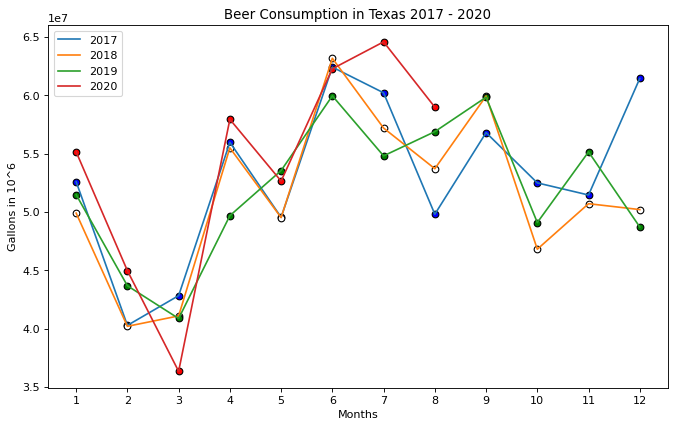

In [102]:
# # # # BEER CONSUMPTION FOR TEXAS 2017 - 2020  # # # # 
figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(month2_17,gallons2_17, facecolors="blue", edgecolors="black" )
plt.scatter(month2_18,gallons2_18, facecolors="white", edgecolors="black" )
plt.scatter(month2_19,gallons2_19, facecolors="green", edgecolors="black" )
plt.scatter(month2_20,gallons2_20, facecolors="red", edgecolors="black" )
plt.plot(month2_17,gallons2_17, label = "2017")
plt.plot(month2_18,gallons2_18, label = "2018")
plt.plot(month2_19,gallons2_19, label = "2019")
plt.plot(month2_20,gallons2_20, label = "2020")
plt.xticks(month2_17)
plt.title("Beer Consumption in Texas 2017 - 2020")
plt.xlabel("Months")
plt.ylabel("Gallons in 10^6")
plt.legend(loc="best")
plt.savefig("Beer_consumption_tx.png")
plt.show()


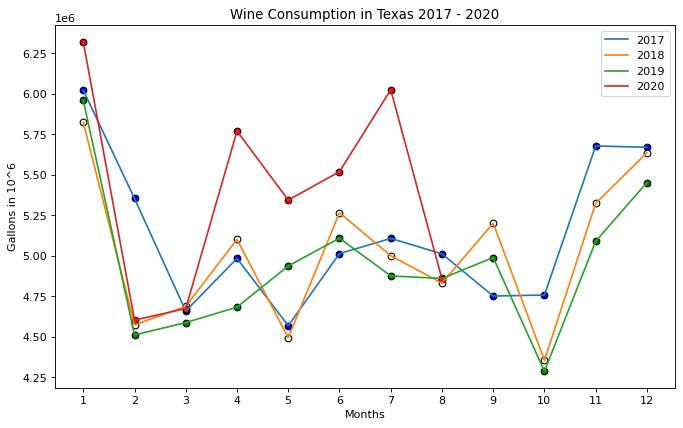

In [103]:
# # # # # # WINE COMSUMPTION FOR TEXAS 2017 - 2020 # # # # # # # 

figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(month1_17,gallons1_17, facecolors="blue", edgecolors="black" )
plt.scatter(month1_18,gallons1_18, facecolors="white", edgecolors="black" )
plt.scatter(month1_19,gallons1_19, facecolors="green", edgecolors="black" )
plt.scatter(month1_20,gallons1_20, facecolors="red", edgecolors="black" )
plt.plot(month1_17,gallons1_17, label = "2017")
plt.plot(month1_18,gallons1_18, label = "2018")
plt.plot(month1_19,gallons1_19, label = "2019")
plt.plot(month1_20,gallons1_20, label = "2020")
plt.xticks(month2_17)
plt.title("Wine Consumption in Texas 2017 - 2020")
plt.xlabel("Months")
plt.ylabel("Gallons in 10^6")
plt.legend(loc="best")
plt.savefig("Wine_consumption_tx.png")
plt.show()


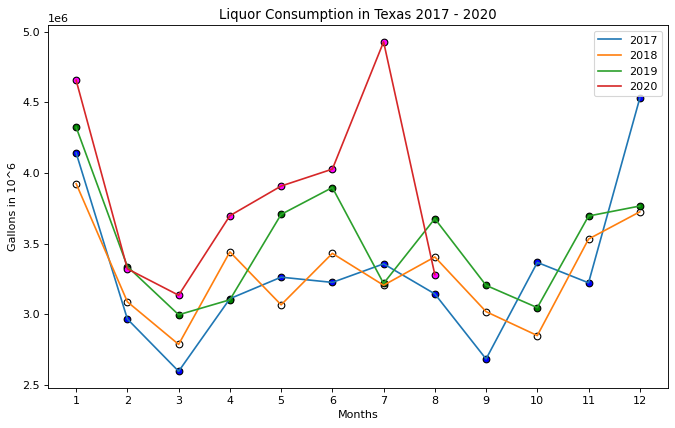

In [104]:
# # # # # LIQUOR CONSUMPTION FOR TEXAS 2017 - 2020 # # # # # # 

figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(month_17,gallons_17, facecolors="blue", edgecolors="black" )
plt.scatter(month_18,gallons_18, facecolors="white", edgecolors="black" )
plt.scatter(month_19,gallons_19, facecolors="green", edgecolors="black" )
plt.scatter(month_20,gallons_20, facecolors="magenta", edgecolors="black" )
plt.plot(month_17,gallons_17, label = "2017")
plt.plot(month_18,gallons_18, label = "2018")
plt.plot(month_19,gallons_19, label = "2019")
plt.plot(month_20,gallons_20, label = "2020")
plt.xticks(month2_17)
plt.title("Liquor Consumption in Texas 2017 - 2020")
plt.xlabel("Months")
plt.ylabel("Gallons in 10^6")
plt.legend(loc="best")
plt.savefig("liquor_consumption_tx.png")
plt.show()


In [67]:
### RAJ'S DATA ### 

csv_path3  = os.path.join("Resources/Revenue_data.csv")


rev_data1 = pd.read_csv(csv_path3)

rev_data = pd.DataFrame(rev_data1)

rev_data = rev_data.rename(columns= {"MRTSSM4453USN":"Revenue by Million"}) 
rev_data['DATE'].replace({"2019-01-01" :"JAN. 19", 
                          "2019-06-01": "JUNE. 19",
                          "2019-10-01": "OCT. 19",
                          "2020-02-01": "FEB. 20", 
                          "2020-04-01": "APRIL. 20", 
                          "2020-06-01" : "JUNE. 20", 
                          "2020-09-01" : "SEP. 20", 
                          "2020-11-01" : "NOV. 20", 
                         }, inplace=True)




In [68]:
print(rev_data) # print the data 
year_2019 = rev_data[0:11].sum(axis = 0) # sum the total revenue across 2019 dates
# axis=0 is to sum across the column
print(year_2019["Revenue by Million"])
year_2020 = rev_data[12:22].sum(axis=0) # sum the total revenue across 2020 dates
print(year_2020["Revenue by Million"])




          DATE  Revenue by Million
0      JAN. 19                4134
1   2019-02-01                4116
2   2019-03-01                4673
3   2019-04-01                4580
4   2019-05-01                5109
5     JUNE. 19                5011
6   2019-07-01                5245
7   2019-08-01                5270
8   2019-09-01                4680
9      OCT. 19                4913
10  2019-11-01                5312
11  2019-12-01                6630
12  2020-01-01                4388
13     FEB. 20                4533
14  2020-03-01                5521
15   APRIL. 20                5211
16  2020-05-01                6263
17    JUNE. 20                6078
18  2020-07-01                6423
19  2020-08-01                6099
20     SEP. 20                5855
21  2020-10-01                6050
22     NOV. 20                6088
53043
63051


In [81]:
seq = [0,5,9,13,15,17,20,22] # create a list of random indices
rev_data1 = rev_data.iloc[seq, ] #subset of the data


In [82]:
rev_data = rev_data.rename(columns= {"MRTSSM4453USN":"Revenue by Million"})
rev_data['DATE'].replace({"2019-01-01" :"JAN. 19", 
                          "2019-06-01": "JUNE. 19",
                          "2019-10-01": "OCT. 19",
                          "2020-02-01": "FEB. 20", 
                          "2020-04-01": "APRIL. 20", 
                          "2020-06-01" : "JUNE. 20", 
                          "2020-09-01" : "SEP. 20", 
                          "2020-11-01" : "NOV. 20", 
                         }, inplace=True)


In [83]:
seq = [0,5,9,13,15,17,20,22] # create a list of random indices
rev_data1 = rev_data.iloc[seq, ] #subset of the data


Text(0.5, 0, 'Date')

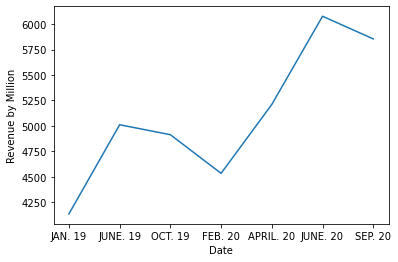

In [84]:
# show line plot
plt.plot(rev_data1['DATE'], rev_data1['Revenue by Million'])
plt.ylabel('Revenue by Million')
plt.xlabel('Date')


In [74]:
result = pd.concat([year_2019, year_2020]) # make a list of the two sums for the two years


In [75]:
# create a data to later turn into a pandas df
data1 = {'Year': ["2019", "2020"],'Revenue by Million': [result["Revenue by Million"][0], result["Revenue by Million"][1]]}


In [76]:
total_df = pd.DataFrame(data = data1) # create dataframe 

In [77]:
total_df

,Year,Revenue by Million
0,2019,53043
1,2020,63051


Text(0.5, 0, 'Year')

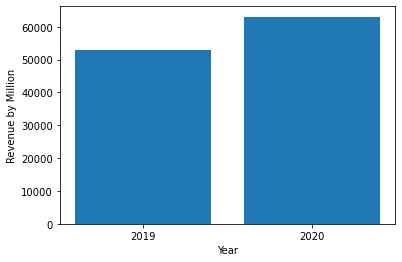

In [78]:
# plot the totals
plt.bar(total_df['Year'], total_df['Revenue by Million'], width=0.8)
plt.ylabel('Revenue by Million')
plt.xlabel('Year')

In [86]:
## JOSE DATA ##########

#link to the csv
police_df.head()

,Unnamed: 0,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUIcrashes/2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUIcrashes/2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272


In [87]:
#Rename first column to date and remove Entire Period row
police_df.dtypes

Unnamed: 0                     object
Unsafespeedcrashes/2020        object
Improperturningcrashes/2020    object
DUIcrashes/2020                object
Othercrashes/2020              object
Unsafespeedcrashes/2019        object
Improperturningcrashes/2019    object
DUIcrashes/2019                object
Othercrashes/2019              object
dtype: object

In [88]:
police_df = police_df.rename(columns= {"Unnamed: 0":"Date", "DUIcrashes/2020":"DUI crashes 2020", "DUIcrashes/2019":"DUI crashes 2019"})
police_df.head(20)

,Date,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUI crashes 2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUI crashes 2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272
5,3/2/20,531,223,110,303,617,192,98,263
6,3/9/20,655,269,102,253,593,213,124,330
7,3/16/2020,333,178,58,146,665,193,101,300
8,3/23/20,161,150,71,120,594,197,98,279
9,3/30/20,162,152,64,116,562,205,96,253


In [89]:
#Remove asterisk from date '3/16/2020'
police_df['Date'].unique()

array(['Entire Period', '2/3/20', '2/10/20', '2/17/20', '2/24/20',
       '3/2/20', '3/9/20', '3/16/2020', '3/23/20', '3/30/20', '4/6/20',
       '4/13/20', '4/20/20', '4/27/20', '5/4/20', '5/11/20', '5/18/20',
       '5/25/20', '6/1/20', '6/8/20', '6/15/20', '6/22/20', '6/29/20',
       '7/6/20', '7/13/20', '7/20/20', '7/27/20', '8/3/20', '8/10/20',
       '8/17/20', '8/24/20', '8/31/20', '9/7/20', '9/14/20', '9/21/20',
       '9/28/20', '10/5/20', '10/12/20', '10/19/20', '10/26/20',
       '11/2/20', '11/9/20', '11/16/20', '11/23/20', '11/30/20',
       '12/7/20', '12/14/20', '12/21/20', '12/28/20', '1/4/21', '1/11/21',
       '1/18/21', '1/25/21', '2/1/21'], dtype=object)

In [90]:
#Remove first summary row from the data set 'Entire Period'
police_df = police_df.loc[police_df['Date'] !="Entire Period"]
police_df.head(20)

,Date,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUI crashes 2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUI crashes 2019,Othercrashes/2019
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272
5,3/2/20,531,223,110,303,617,192,98,263
6,3/9/20,655,269,102,253,593,213,124,330
7,3/16/2020,333,178,58,146,665,193,101,300
8,3/23/20,161,150,71,120,594,197,98,279
9,3/30/20,162,152,64,116,562,205,96,253
10,4/6/20,360,189,66,111,590,193,95,279


In [91]:
#groupby function to set apart my more important variables
DUI_crashes_df = police_df[["Date", "DUI crashes 2020", "DUI crashes 2019"]]
DUI_crashes_df

,Date,DUI crashes 2020,DUI crashes 2019
1,2/3/20,102,114
2,2/10/20,120,82
3,2/17/20,100,88
4,2/24/20,98,105
5,3/2/20,110,98
6,3/9/20,102,124
7,3/16/2020,58,101
8,3/23/20,71,98
9,3/30/20,64,96
10,4/6/20,66,95


In [92]:
#define dtype
type(DUI_crashes_df["Date"][1])


str

In [ ]:
#convert Date from string to actual dates
#print(DUI_crashes_df["Date"])
#DUI_crashes_df["Date"]= pd.to_datetime(DUI_crashes_df["Date"], format ='%m%m%Y')
#DUI_crashes_df.info()

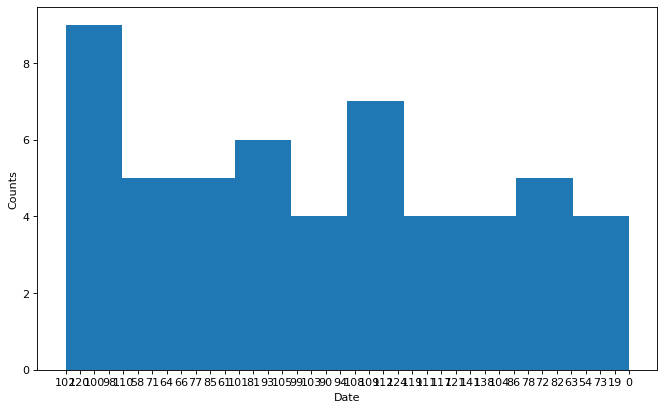

In [96]:
figure(num=None, figsize=(10, 6), dpi=80)
plt.hist(DUI_crashes_df['DUI crashes 2020'])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()

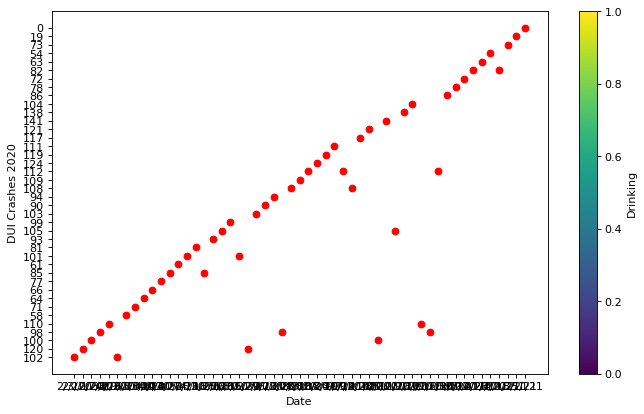

In [95]:
#make a chart to show correlation
figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(DUI_crashes_df['Date'], DUI_crashes_df['DUI crashes 2020'], color="red", label= "month")
clb = plt.colorbar()
plt.xlabel("Date")
plt.ylabel("DUI Crashes 2020")
clb.set_label("Drinking")
plt.show()